In [59]:
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import seaborn.apionly as sns
from keras.models import model_from_json
from keras.layers import Embedding


In [3]:
#from glove import Corpus, Glove
import codecs
import h5py
import pickle
import tensorflow as tf
import pandas as pd
import json
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import  cross_val_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn import metrics
import scipy
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import os
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import keras
from keras.preprocessing import sequence
import math
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import multiprocessing
import re
np.random.seed(13)
from keras.models import Model
from keras.layers import Dense, Embedding, GRU, Input, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from matplotlib import pyplot as plt
from keras.utils import plot_model
%matplotlib inline
plt.style.use("ggplot")

//anaconda/envs/dl/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/envs/dl/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.core import Flatten,Reshape
from keras.models import load_model
from keras.layers.wrappers import TimeDistributed
from keras.layers import Input, Dense, Conv1D, MaxPooling2D, UpSampling1D
from keras.models import Model
from keras import backend as K
from tensorflow.python.lib.io import file_io

In [5]:
with open("big_data.txt", 'rb') as f:
    data = pickle.load(f)

In [6]:
with open("big_data_label.txt", 'rb') as f:
    labels = pickle.load(f)

In [7]:
tokenizer = Tokenizer(lower=True) ## initialise tokenizer
tokenizer.fit_on_texts(data)     ## fit it on our data
sequences = tokenizer.texts_to_sequences(data) ## obtain our sequences

In [11]:
## unique tokens in our data
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 84240 unique tokens.


In [30]:
## setting the max length of our sentences
MAX_SEQUENCE_LENGTH = 8

In [31]:
## pad the sequences so that they are of the same length
data1 = pad_sequences(sequences,maxlen = MAX_SEQUENCE_LENGTH)

In [32]:
labels1 = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data1.shape)
print('Shape of label tensor:', labels1.shape)

Shape of data tensor: (920695, 8)
Shape of label tensor: (920695, 5)


In [34]:
## specify test split 
TEST_SPLIT = 0.2

In [35]:
## we manually specified the test , train and validation split 
indices = np.arange(data1.shape[0])
np.random.shuffle(indices)    ## shuffle our data so that we don't feed them in order or provide the same pattern
data1 = data1[indices]
labels1 = labels1[indices]
nb_test_samples = int(TEST_SPLIT * data1.shape[0])
## specify our train test split
x_train = data1[:-nb_test_samples]
y_train = labels1[:-nb_test_samples]
x_test = data1[-nb_test_samples:]
y_test = labels1[-nb_test_samples:]

In [36]:
val_split = 0.2 ## validation split
nb_validation_data = int(val_split * x_train.shape[0])

In [37]:
## validation data
x_val = x_train[-nb_validation_data:]
y_val = y_train[-nb_validation_data:]

In [38]:
## check the shapes
x_train.shape,x_test.shape

((736556, 8), (184139, 8))

In [39]:
## check the validation shapes
x_val.shape,x_val.shape



((147311, 8), (147311, 8))

In [40]:
embeddings_index = {}
f = codecs.open(os.path.join('glove.6B', 'glove.6B.100d.txt'),encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [41]:
EMBEDDING_DIM = 100

In [42]:
## load our pre-trained glove embedding of the wiki corpus
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        

In [43]:
## specify the dimensions for embedding
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [44]:
## carried out using the keras api
## CNN that feeds into GRU which is a simple lstm layer , time distributed dense to get it over th entire sequence
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(50, 3, activation='relu')(embedded_sequences)
x = Dropout(0.5)(x)
x = GRU(128, input_dim=64, input_length=10, return_sequences=True)(x)
x = TimeDistributed(Dense(128, activation='relu'))(x)
x = Dropout(0.5)(x)
x = Flatten()(x) ## reduce to 2 dimensional to make predictions
preds = Dense(5, activation='softmax')(x) ## making predictions

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

//anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
//anaconda/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(128, return_sequences=True, input_shape=(10, 64))`


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 8, 100)            8424100   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 50)             15050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 50)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 6, 128)            68736     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 6, 128)            16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 128)            0         
__________

In [46]:
## Adding checkpoints when running on the cloud
#filepath="glove.best1.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [47]:
## fit the model over 10 epochs , specifying the validation split, standard batch size of 128
model.fit(x_train, y_train, validation_data=(x_val,y_val),
          epochs=1,batch_size=128)

Train on 736556 samples, validate on 147311 samples
Epoch 1/1
736556/736556 [==============================] - 303s - loss: 0.2102 - acc: 0.9296 - val_loss: 0.1480 - val_acc: 0.9511


In [48]:
## check score on test data
model.evaluate(x_test, y_test,
                       verbose=1)

184000/184139 [============================>.] - ETA: 0s

[0.15218618319130992, 0.95008118866725677]

In [49]:
## Get the model predictions
y_predicted_arr = model.predict(x_test)

In [50]:
## Get the most probably class prediction of the model
y_predicted = []
for i in y_predicted_arr:
    y_predicted.append(np.where(np.max(i) == i)[0][0])

In [51]:
## convert the one hot encoding back to original numbered values
y_test_labels = []
for i in y_test:
    y_test_labels.append(np.where(i==1)[0][0])

In [52]:
## recall score of the model using scikit-learn (true positive/ true positive + false negative)
recall_score(y_test_labels, y_predicted, average='weighted')

0.95008118866725677

In [53]:
## precision score of the model using scikit-learn (true positive/ true positive + false positive)
precision_score(y_test_labels, y_predicted, average='weighted')

0.95015554572352168

In [54]:
## f1-score of the model using scikit-learn (2 * (precision * recall) / (precision + recall))
f1_score(y_test_labels, y_predicted, average='weighted')

0.94993553552752907

In [55]:
## save the model
model.save('spyder-final.h5')

In [56]:
## Color coded confusion matrix, brown represents the correctly classified classes
T = np.zeros([5,5])
for d_now,d_next in zip(y_test_labels,y_predicted):
    T[int(d_now),int(d_next)] += 1
pd.DataFrame(T,columns = ['preparation(0)','ingredients(1)','nutrient(2)','reviews(3)','title(4)']).style\
.set_properties(**{'max-width': '500px', 'font-size': '20pt'})\
.set_caption('confusion matrix for the multi-label classification')\
.background_gradient(cmap=sns.diverging_palette(1000,25,as_cmap=True))


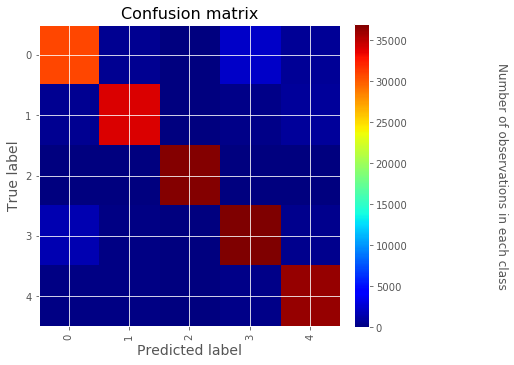

In [72]:
## color Defines the intensity for the confusion matrix
def plot_confusion_matrix(y_true,y_pred):
    cm_array = metrics.confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array, interpolation='nearest', cmap=plt.cm.jet)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of observations in each class', rotation=270, labelpad=100, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 5
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
#print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_test_labels,y_predicted)

In [73]:
def misclassification(actual,predicted):
    
    
## This function prints out the misclassified sentence and the class it was misclassified into
## As can be seen in the confusion matrix , we have numbers corresponding to each of the classes
## As an example if you want to see the sentences or text that were misclassified as ingredients,
## but were actually a preparation instruction you would want to enter actual = 0 and predicted = 1
    count = 0 
    index = []
    for i,j in zip(y_test_labels,y_predicted):
        count +=1
        if i == actual and j == predicted:
            index.append(count)
    print("total misclassified",len(index))
    for i in index:
        print (data[i])

In [74]:
## The first line starts with roast the sweet potatoes , which misguides the model and makes it to predict it as being ingredient although it is a preparation
misclassification(0,1)

total misclassified 641
Roast the sweet potatoes: Preheat the oven to 425 degrees Fahrenheit and line a large, rimmed baking sheet with parchment paper for easy clean-up. Toss the prepared sweet potatoes with the olive oil, cayenne pepper (if using) and salt. Arrange in a single layer and bake for 30 to 40 minutes, tossing halfway, until the sweet potatoes are tender and caramelizing at the edges.
Cover and cook on medium heat till the turai and dal are soft.
Whip chilled evaporated milk until stiff; add lemon juice and continue whipping until very stiff.
Add the stock, milk and salt and pepper to taste.
Combine biscuit crumbs and butter, press into base of a lined and greased 20cm spring form pan; chill.
Add oil, garlic and onion to skillet, cook on medium until onion is clear.
Add ground beef, cook until no longer pink, drain.
Combine the oats, flour, baking soda and salt; add to creamed mixture and mix well. Stir in walnuts and chocolate chips. Cover and refrigerate for at least 4 h